In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

A. Provide summary statistics of the predictors. (5 points)

In [2]:
df = pd.read_csv("CreditCard.csv")
predictors = ['reports', 'income', 'age', 'owner', 'dependents', 'months', 'share']
df[predictors].describe()

,reports,income,age,dependents,months,share
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,3.365376,33.213103,0.993935,55.267627,0.068732
std,1.345267,1.693902,10.142783,1.247745,66.271746,0.094656
min,0.000000,0.210000,0.166667,0.000000,0.000000,0.000109
25%,0.000000,2.243750,25.416670,0.000000,12.000000,0.002316
50%,0.000000,2.900000,31.250000,1.000000,30.000000,0.038827
75%,0.000000,4.000000,39.416670,2.000000,72.000000,0.093617
max,14.000000,13.500000,83.500000,6.000000,540.000000,0.906320


B. Consider only data with age > 18 for the rest of the analysis. (5 points)

In [3]:
df = df[df['age'] > 18]
print(df.head())

  card  reports       age  income     share  expenditure owner selfemp  \
0  yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1  yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2  yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3  yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4  yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


C. Plot of income vs. reports: mark individuals with card application accepted as blue, and not accepted as red. (5 points)

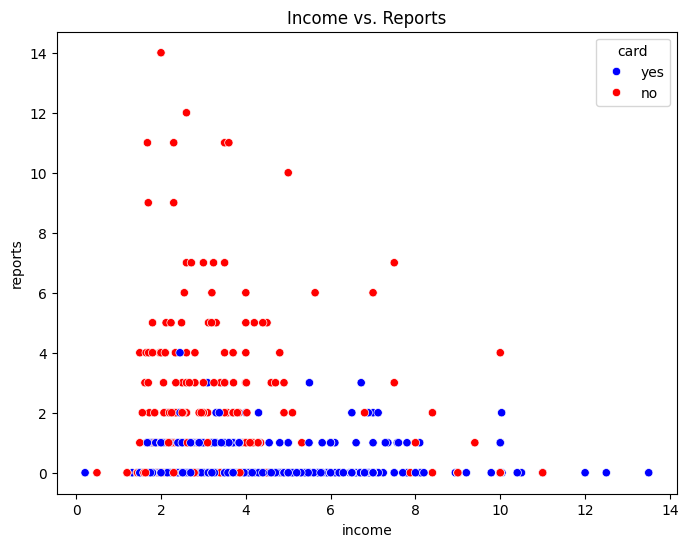

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='income', y='reports', hue='card', palette={'yes': 'blue', 'no': 'red'})
plt.title('Income vs. Reports')
plt.show()

D. Boxplots of income and reports as a function of card acceptance status. (5 points)

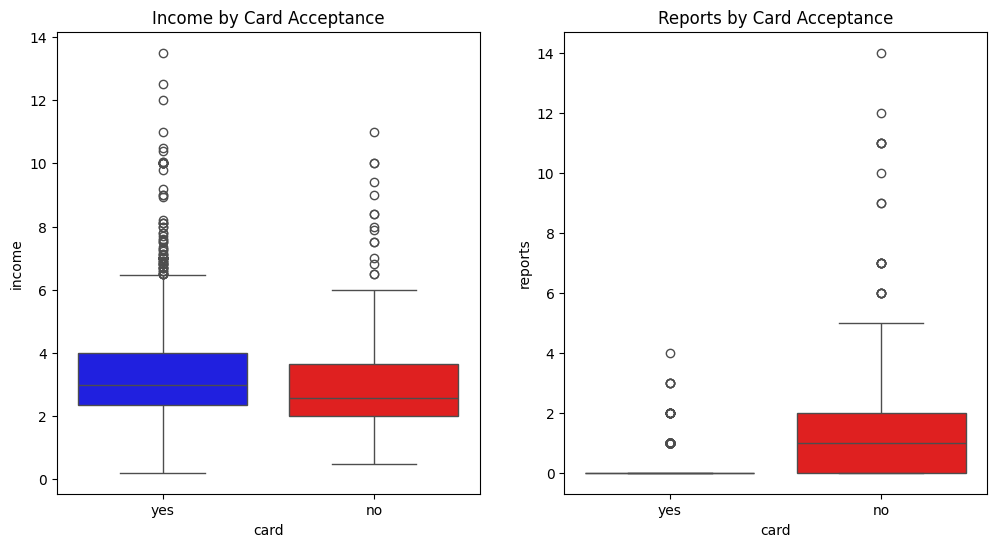

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='card', y='income', data=df, ax=axes[0], hue='card', palette={'yes': 'blue', 'no': 'red'})
sns.boxplot(x='card', y='reports', data=df, ax=axes[1], hue='card', palette={'yes': 'blue', 'no': 'red'})
axes[0].set_title('Income by Card Acceptance')
axes[1].set_title('Reports by Card Acceptance')
plt.show()

E. Construct the histogram for the predictors. (5 points)

  card  reports       age  income     share  expenditure owner selfemp  \
0  yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1  yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2  yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3  yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4  yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   

   dependents  months  majorcards  active  log_share  log_reports  
0           3      54           1      12  -3.403102          0.0  
1           3      34           1      13  -5.255844          0.0  
2           4      58           1       5  -5.483309          0.0  
3           0      25           1       7  -2.730084          0.0  
4           2      64           1       5  -2.702308          0.0  


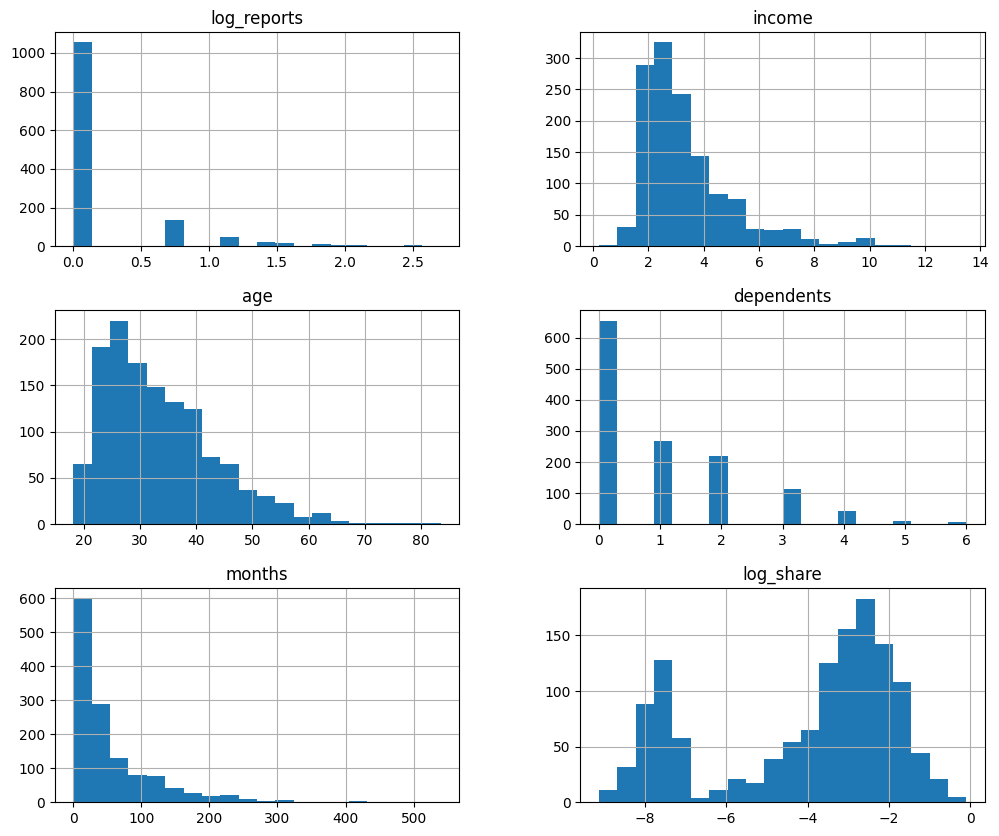

In [6]:
df['log_share'] = np.log(df['share'])
df['log_reports'] = np.log(df['reports'] + 1)
print(df.head())
predictors1 = ['log_reports', 'income', 'age', 'owner', 'dependents', 'months', 'log_share']
df[predictors1].hist(figsize=(12,10), bins=20)
plt.show()

F.	Using Logistic Regression with variables 2 to 8 determine which of the predictors influence the probability that an application is accepted. Use the summary function to print the results. (5 points)

In [22]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split

X = df[predictors]
y = df['card']

categories = ['owner', 'card']
for cat in categories:
    df[cat] = df[cat].replace({'yes': 1, 'no': 0})

X = sm.add_constant(X)


# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.054451
         Iterations 22
                           Logit Regression Results                           
Dep. Variable:                   card   No. Observations:                 1312
Model:                          Logit   Df Residuals:                     1304
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                  0.8978
Time:                        02:23:36   Log-Likelihood:                -71.440
converged:                       True   LL-Null:                       -699.26
Covariance Type:            nonrobust   LLR p-value:                6.523e-267
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5817      0.859     -5.334      0.000      -6.265      -2.898
reports       -2.0253      0

G.	To predict whether the application will be accepted or not, convert the predicted probabilities into class labels yes with the following condition: probs >.5="yes". Compute the confusion matrix and overall fraction of correct predictions.  (15 points)

In [23]:
y_prob = model.predict_proba(X)[:, 1]
y_pred = (y_prob > 0.5).astype(int)

print(confusion_matrix(y, y_pred))
print(f'Accuracy: {accuracy_score(y, y_pred)}')

[[128 167]
 [ 22 995]]
Accuracy: 0.8559451219512195


H.	Now fit the logistic regression model using a training data for observations 1 to 1000. Compute the confusion matrix and the overall fraction of correct predictions for the test data (that is, the data for observations 1001 to end of data.)	(20 points)

In [26]:
# Split the data into training and test sets
X_train = X.iloc[:1000, :]
y_train = y.iloc[:1000]
X_test = X.iloc[1000:, :]
y_test = y.iloc[1000:]

# Add a constant (intercept) to the training and test data
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logistic regression model on the training data
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Make predictions on the test data
y_pred_prob = result.predict(X_test)  # Probabilities for class 1
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

print(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Optimization terminated successfully.
         Current function value: 0.047517
         Iterations 33
[[ 71   3]
 [  6 232]]
Accuracy: 0.9711538461538461


I.	Apply Discriminant Analysis (LDA), Nearest-Neighbors, Naïve Bayes in the training and test data created in Part H and provide the performance of the models that analyze credit card application acceptance. (20 points)

In [27]:
models = {
    'LDA': LinearDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    print(f'--- {name} ---')
    print(confusion_matrix(y_test, preds))
    print(f'Accuracy: {accuracy_score(y_test, preds)}')

--- LDA ---
[[ 24  50]
 [  0 238]]
Accuracy: 0.8397435897435898
--- KNN ---
[[ 10  64]
 [  7 231]]
Accuracy: 0.7724358974358975
--- Naive Bayes ---
[[ 71   3]
 [ 11 227]]
Accuracy: 0.9551282051282052


J.	Comparing H and I - which model performs the best and why? Provide your reasoning in the final model selection and validation. You need to provide a summary of your reasoning in the Python Program (15 points)

Model H performs the best as it has the highest accuracy.